In [34]:
import itertools
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from mdp import *
from utils import *

%matplotlib inline

np.random.seed(0)

In [35]:
gridmdp_small = GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)])

In [36]:
pi_gmdps = best_policy(gridmdp_small, value_iteration(gridmdp_small, .01)[0])
gridmdp_small.to_arrows(pi_gmdps)

[['>', '>', '>', '.'], ['^', None, '^', '.'], ['^', '>', '^', '<']]

In [37]:
from utils import print_table
print_table(gridmdp_small.to_arrows(pi_gmdps))
U_vi, vi_iter_time, vi_deltas = value_iteration(gridmdp_small)

>   >      >   .
^   None   ^   .
^   >      ^   <


Text(0.5,0,'Iteration number')

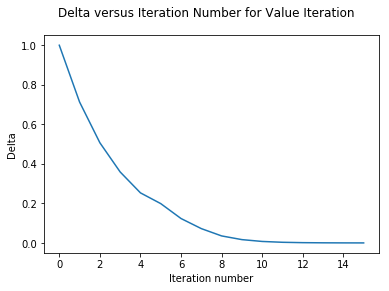

In [38]:
plt.plot(vi_deltas)
plt.suptitle("Delta versus Iteration Number for Value Iteration")
plt.ylabel("Delta")
plt.xlabel("Iteration number")
#vi_deltas_plot.title()

[[ 0.50939438  0.64958568  0.79536209  1.        ]
 [ 0.39844322         nan  0.48644002 -1.        ]
 [ 0.29628832  0.253867    0.34475423  0.12987275]]


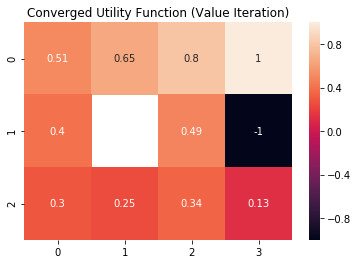

In [39]:
def utility_dict_toarray(utility_dict, shape):
    utility_array = np.ndarray(shape)
    for (r, c) in itertools.product(range(utility_array.shape[0]), range(utility_array.shape[1])):
        utility_array[r,c] = utility_dict.get((c, r), np.NaN)
    return np.flip(utility_array, 0)

vi_utility_array = utility_dict_toarray(U_vi, (3,4))

print(vi_utility_array)

utility_array_df = pd.DataFrame(vi_utility_array)
vi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")

[[ 0.5013364   0.64659465  0.79516893  1.        ]
 [ 0.35945615         nan  0.48523429 -1.        ]
 [ 0.24468044  0.24301859  0.3387784   0.10956261]]
>   >      >   .
^   None   ^   .
^   >      ^   <


True

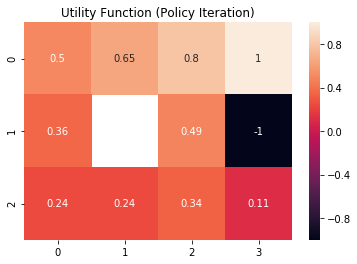

In [40]:
pi, U, pi_iter_time, deltas = policy_iteration(gridmdp_small, k=1)
pi_utility_array = utility_dict_toarray(U, (3,4))

print(pi_utility_array)

utility_array_df = pd.DataFrame(pi_utility_array)

sns.heatmap(utility_array_df, annot=True).set_title("Utility Function (Policy Iteration)")

print_table(gridmdp_small.to_arrows(pi))

gridmdp_small.to_arrows(pi) == gridmdp_small.to_arrows(pi_gmdps)

Text(0.5,0,'Iteration number')

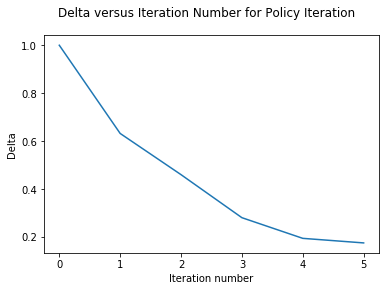

In [41]:
plt.plot(deltas)
plt.suptitle("Delta versus Iteration Number for Policy Iteration")
plt.ylabel("Delta")
plt.xlabel("Iteration number")

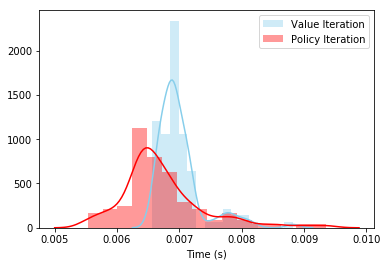

In [42]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = 0.9)
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp, k=11)', setup = setup).repeat(100,10)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,10)


times_df = pd.DataFrame({'Value Iteration':vi_time, 'Policy Iteration':pi_time})

sns.distplot( times_df["Value Iteration"] , color="skyblue", label="Value Iteration")
sns.distplot( times_df["Policy Iteration"] , color="red", label="Policy Iteration")
plt.xlabel("Time (s)")
plt.legend()

Text(0,0.5,'Time (s)')

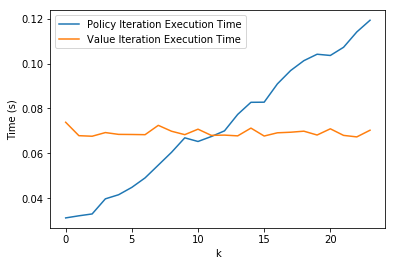

In [43]:
pi_klist = ['mdp.policy_iteration(gridmdp, k={})'.format(x) for x in range(1,25)]
pi_times, vi_times = [], []
for k_pi_call in pi_klist:
    pi_times.append(timeit.timeit(k_pi_call, number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp)', number = 100, setup=setup))

plt.plot(pi_times, label='Policy Iteration Execution Time')
plt.plot(vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("k")
plt.ylabel("Time (s)")

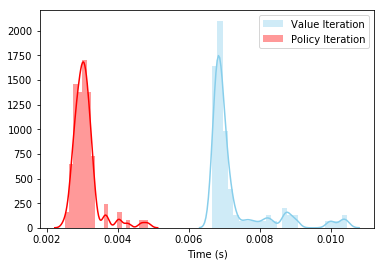

In [44]:
pi_time = timeit.Timer('mdp.policy_iteration(gridmdp, k=1)', setup = setup).repeat(100,10)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,10)

times_df = pd.DataFrame({'Value Iteration':vi_time, 'Policy Iteration':pi_time})

sns.distplot( times_df["Value Iteration"] , color="skyblue", label="Value Iteration")
sns.distplot( times_df["Policy Iteration"] , color="red", label="Policy Iteration")
plt.xlabel("Time (s)")
plt.legend()

Text(0,0.5,'Time (s)')

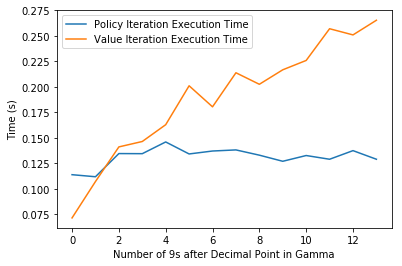

In [59]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = {})
'''

setup_list = [setup.format("0." + x*"9") for x in range(1,15)]

pi_times = []
vi_times = []

for setup in setup_list:
    pi_times.append(timeit.timeit('mdp.policy_iteration(gridmdp, k=20)', number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp)', number = 100, setup=setup))

plt.plot(pi_times, label='Policy Iteration Execution Time')
plt.plot(vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("Number of 9s after Decimal Point in Gamma")
plt.ylabel("Time (s)")

Text(0,0.5,'Time (s)')

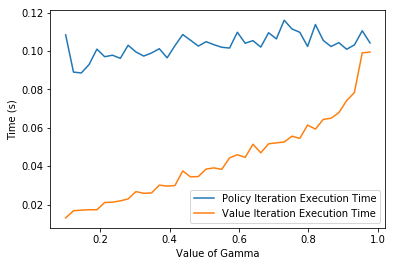

In [57]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = {})
'''

setup_list = [setup.format(x) for x in np.linspace(.1,1,40, endpoint=False)]

pi_times = []
vi_times = []

for setup in setup_list:
    pi_times.append(timeit.timeit('mdp.policy_iteration(gridmdp, k=20)', number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp)', number = 100, setup=setup))

plt.plot(np.linspace(.1,1,40, endpoint=False), pi_times, label='Policy Iteration Execution Time')
plt.plot(np.linspace(.1,1,40, endpoint=False), vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("Value of Gamma")
plt.ylabel("Time (s)")

# Large MDP

In [45]:
gridmdp = GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])

In [46]:
pi = best_policy(gridmdp, value_iteration(gridmdp, .01)[0])
gridmdp.to_arrows(pi)

[['>', '>', '>', '>', '>', '>', 'v', 'v'],
 ['v', None, 'v', 'v', 'v', None, 'v', 'v'],
 ['>', '>', '>', '>', '>', '>', 'v', 'v'],
 ['>', '>', '>', '>', '>', '>', '>', 'v'],
 ['^', None, '>', '>', '^', None, '>', '.'],
 ['>', '>', '>', '>', '>', '>', '^', '.']]

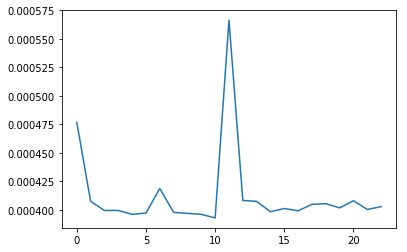

In [14]:
U_vi, vi_iter_time, deltas = value_iteration(gridmdp)
plt.plot(vi_iter_time)

In [15]:
vi_utility_dict, iter_time, d = value_iteration(gridmdp)

[[ 0.0470635   0.11081334  0.18177099  0.25698742  0.3409406   0.43435796
   0.53795894  0.65245418]
 [ 0.03416822         nan  0.22648568  0.31536193  0.41687432  0.53261682
   0.66417455  0.81294033]
 [ 0.09458304  0.17293099  0.25632262  0.35649541  0.47451101  0.61465605
   0.78268053  1.        ]
 [ 0.07811426  0.14250221  0.21406138  0.29407239  0.38267129  0.47989722
   0.47672057 -1.        ]]


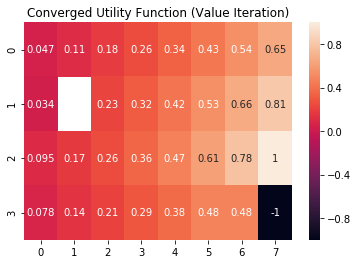

In [16]:
vi_utility_array = utility_dict_toarray(vi_utility_dict, (4,8))


print(vi_utility_array)

utility_array_df = pd.DataFrame(vi_utility_array)

vi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")

>   >      >   >   >   >   >   v
v   None   >   >   >   >   >   v
>   >      >   >   >   >   >   .
>   >      >   >   >   ^   ^   .


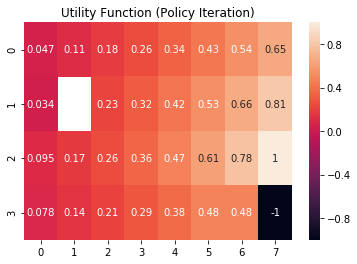

In [17]:
pi, U, pi_iter_time, d = policy_iteration(gridmdp)
pi_utility_array = utility_dict_toarray(U, (4,8))

utility_array_df = pd.DataFrame(pi_utility_array)

sns.heatmap(utility_array_df, annot=True).set_title("Utility Function (Policy Iteration)")

print_table(gridmdp.to_arrows(pi))

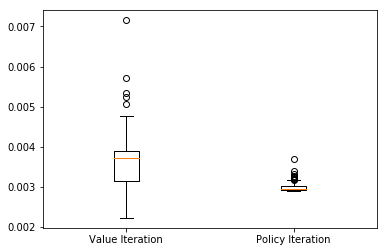

In [60]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp)', setup = setup).repeat(100,1)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,1)

bp = plt.boxplot([pi_time, vi_time], labels=["Value Iteration", "Policy Iteration"])

In [61]:
pi = best_policy(gridmdp, value_iteration(gridmdp, .01)[0])
print(pi)

{(7, 3): (0, -1), (1, 3): (1, 0), (3, 0): (1, 0), (0, 2): (1, 0), (2, 1): (1, 0), (6, 2): (1, 0), (2, 5): (1, 0), (0, 3): (1, 0), (7, 2): (0, -1), (4, 0): (1, 0), (1, 2): (1, 0), (3, 3): (1, 0), (5, 5): (1, 0), (4, 4): (0, -1), (6, 3): (0, -1), (1, 5): (1, 0), (5, 0): (1, 0), (2, 2): (1, 0), (0, 4): (0, -1), (4, 1): (0, 1), (6, 4): (0, -1), (3, 2): (1, 0), (0, 0): (1, 0), (7, 1): None, (4, 5): (1, 0), (5, 2): (1, 0), (6, 0): (0, 1), (7, 5): (0, -1), (0, 5): (1, 0), (2, 3): (1, 0), (4, 2): (1, 0), (1, 0): (1, 0), (6, 5): (0, -1), (3, 5): (1, 0), (0, 1): (0, 1), (5, 3): (1, 0), (7, 0): None, (6, 1): (1, 0), (3, 1): (1, 0), (7, 4): (0, -1), (2, 0): (1, 0), (4, 3): (1, 0), (3, 4): (0, -1), (2, 4): (0, -1)}


In [62]:
print_table(gridmdp.to_arrows(pi))

>   >      >   >   >   >      v   v
v   None   v   v   v   None   v   v
>   >      >   >   >   >      v   v
>   >      >   >   >   >      >   v
^   None   >   >   ^   None   >   .
>   >      >   >   >   >      ^   .


In [63]:
print_table(gridmdp.to_arrows(pi))

>   >      >   >   >   >      v   v
v   None   v   v   v   None   v   v
>   >      >   >   >   >      v   v
>   >      >   >   >   >      >   v
^   None   >   >   ^   None   >   .
>   >      >   >   >   >      ^   .


In [64]:
from rl import *
q_agent = QLearningAgent(gridmdp, Ne=5, Rplus=2, alpha=lambda n: 60./(59+n))

for i in range(100000):
    run_single_trial(q_agent,gridmdp)

q_agent.Q

actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

policy = {}
for state in gridmdp.states:
    qvals = []
    for action in actions:
        qvals.append(q_agent.Q.get((state,action)))
    try:
        policy[state] = actions[qvals.index(max(qvals))]
    except:
        pass
        
print_table(gridmdp.to_arrows(policy))

<   >      v   >   >   >      >   v   
v   None   v   >   v   None   v   v   
v   >      >   >   >   >      v   v   
>   >      >   >   >   >      >   v   
^   None   ^   ^   ^   None   ^   None
>   >      >   >   ^   <      <   None


In [65]:
q_agent = QLearningAgent(gridmdp, Ne=5, Rplus=2, alpha=lambda n: 1000./(999+n))

for i in range(100000):
    run_single_trial(q_agent,gridmdp)

q_agent.Q

actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

policy = {}
for state in gridmdp.states:
    qvals = []
    for action in actions:
        qvals.append(q_agent.Q.get((state,action)))
    try:
        policy[state] = actions[qvals.index(max(qvals))]
    except:
        pass
        
print_table(gridmdp.to_arrows(policy))

>   >      >   >   v   >      >   v   
<   None   v   >   v   None   v   v   
v   >      >   >   >   v      v   v   
>   >      >   >   ^   >      >   v   
^   None   >   ^   ^   None   ^   None
^   >      ^   ^   ^   >      <   None


In [66]:
print_table(gridmdp.to_arrows(pi))

>   >      >   >   >   >      v   v
v   None   v   v   v   None   v   v
>   >      >   >   >   >      v   v
>   >      >   >   >   >      >   v
^   None   >   >   ^   None   >   .
>   >      >   >   >   >      ^   .


In [67]:
gridmdp_small_gamma = GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = 0.5)
